# Excited States from BSE
**by <span style="color:darkgreen">Benjamin Aurich</span>, <span style="color:darkgreen">Christian Vorwerk</span>, <span style="color:darkgreen">Caterina Cocchi</span>, & <span style="color:darkgreen">Keith Gilmore</span> for [<span style="color:DarkGoldenRod">exciting *oxygen*</span>](http://exciting.wikidot.com/oxygen)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Maximilian Schebek</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**: In this tutorial you will learn how to perform a basic Bethe-Salpeter-equation (**BSE**) calculation. As an example, the optical spectrum of lithium fluoride (LiF) will be studied.

<hr style="border:2px solid #DDD"> </hr>

<div class="alert alert-block alert-warning">
    
**Table of Contents**

[0. Preparation](#0)
    
[1. Theoretical Background: Bethe-Salpeter Equation](#1)
    
  - The BSE Hamiltonian
    
    
[2. Preliminary Step: Ground-State Calculation](#2)
    
[3. How to Run a BSE Calculation](#3)
    
  - Preparation of the Input File
  - Additional Information about the Calculation Workflow
  - Running exciting and Analysing the Results
  - Scaling and Convergence
  - Exercises
  
    
[4. BSE Calculations on Top of GW](#4)
    
[5. BSE Beyond the TDA](#5)

[Literature](#6)

</div>

<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. Preparation</span>

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from exciting's root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>

</div>

In order to run the scripts used in the **exciting** tutorials, it is important that the relevant environment variables are already defined in your **~/.bashrc** file as specified in **<span style="color:#00578A">How to set environment variables for tutorials scripts</span>**. However, this is not necessary for running the tutorials inside Jupyter Notebooks.

If you want to run this tutorial in a Jupyter Notebook, make sure to create an virutal environment as explained in [**How to start an exciting calculation**](tutorial1.ipynb). Subsequently, you should load all libraries needed for this tutorial by executing the following cell.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from excitingjupyter.utilities import set_plot_parameters


Finally, we determine the root directory of **exciting**, in which the binary executables as well as the species files are located.

In [ ]:
import os
from excitingjupyter.utilities import get_exciting_root

exciting_root = get_exciting_root()
exciting_species = os.path.join(exciting_root, "species")
print(exciting_root)

<a id='1'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Theoretical Background: Bethe-Salpeter Equation</span>
<details>
<summary><strong><span style="color:firebrick">$\Rightarrow$ Click to show theoretical background!</span></strong></summary>

Before starting with the calculation, we briefly review the theoretical background. Many-body perturbation theory (**MBPT**) offers powerful tools such as the Bethe-Salpeter equation (**BSE**) formalism (see [**BSE-1951**](#literature)) to compute bound two-particle states. In the context of optical absorption, the **BSE** formalism is used to describe electron-hole pair excitations. Of particular interest are bound electron-hole pairs with energies below the band gap, which are quasi-particles referred to as **<span style="color:firebrick">excitons</span>**.

**The BSE Hamiltonian**

The **BSE** can be stated as an eigenvalue problem of an effective two-particle Hamiltonian (see, <em>e.g.</em>, [**SAD-2009**](#literature)):
    
$$
H ^{\rm (eff)}\: | A_{\lambda} \rangle= E_{\lambda}\: |A_{\lambda}\rangle\:,
$$
    
where the effective Hamiltonian is defined as
    
$$
H ^{\rm (eff)} = H ^{\rm (diag)}+2\:\gamma_{\rm x}\:H ^{\rm (x)} + \gamma_{\rm c}\:H ^{\rm (c)}\:.
$$
    
In this expression, three terms can be recognized, each carrying a specific physical meaning which will be clarified in the following. Moreover, the factors $\gamma_{\rm x}$ and $\gamma_{\rm c}$ allow one to choose different levels of approximation and to distinguish between **<span style="color:#15317E">spin-singlet</span>** (<em>i.e.</em>, $\gamma_{\rm x} \equiv 1$ and $\gamma_{\rm c} \equiv 1$) and **<span style="color:#15317E">spin-triplet</span>** channels (<em>i.e.</em>, $\gamma_{\rm x} \equiv 0$ and $\gamma_{\rm c} \equiv 1$).

Since the **BSE** describes interacting electron-hole pairs, it is natural to introduce a two-particle basis (see, <em>e.g.</em>, [**SAN-2015**](#literature)) which reflects the excitation (resonant terms, labeled **r**) and the de-excitation (anti-resonant terms, labeled **a**) of independent electron-hole pairs:
    
$$
\Upsilon^\text{r}_{\alpha,\mathbf{q}}(\mathbf{r},\mathbf{r}') = \psi_{v_\alpha \mathbf{k}^+_\alpha}\!(\mathbf{r})\, \psi^*_{c_\alpha \mathbf{k}^-_\alpha}\!(\mathbf{r}')\;\phantom{!} \\[4 mm]
\Upsilon^\text{a}_{\alpha,\mathbf{q}}(\mathbf{r},\mathbf{r}') = \psi_{c_\alpha \mathbf{k}^+_\alpha}\!(\mathbf{r})\, \psi^*_{v_\alpha \mathbf{k}^-_\alpha}\!(\mathbf{r}')\;.
$$
    
Here, $ \psi_{n\mathbf{k}}\!(\mathbf{r}) $ are quasi-particle states. The combined index $\alpha$ incorporates $v$, indicating valence states, $c$ indicating conduction states and $\mathbf{k}$ standing for the **k**-points. The (crystal)-momentum difference between electron and hole is denoted by $\mathbf{q}$, such that $\mathbf{k}^\pm = \mathbf{k} \pm \mathbf{q}/2$. In the case of optical excitations, no momentum transfer from photon to electron is considered ($\mathbf{q} = 0$). In the basis presented above, the Hamiltonian has a $2 \times 2$ block structure
    
$$
H^{\text{(eff)}} = 
\begin{pmatrix}
 H^\text{rr} & H^\text{ra} \\
 H^\text{ar} & H^\text{aa}
\end{pmatrix},
$$
    
with the eigenvectors split into a resonant and an anti-resonant part:
    
$$
H^{\text{(eff)}}
\begin{pmatrix}
 X_\lambda \\
 Y_\lambda
\end{pmatrix}
=
E_\lambda
\begin{pmatrix}
 X_\lambda \\
 Y_\lambda
\end{pmatrix}.
$$
    
We can formally write the eigenvector coefficients in the Dirac notation as
    
$$
\begin{align}
(X_\lambda)_\alpha &= \langle (v_\alpha \mathbf{k}^+_\alpha) (c_\alpha \mathbf{k}^-_\alpha)^* | A_\lambda \rangle \\[4 mm]
(Y_\lambda)_\alpha &= \langle (c_\alpha \mathbf{k}^+_\alpha) (v_\alpha \mathbf{k}^-_\alpha)^* | A_\lambda \rangle.
\end{align}
$$
    
In the **BSE** formalism it is common to adopt the **Tamm-Dancoff-approximation** (**TDA**) which neglects the coupling between the resonant and anti-resonant components of the Hamiltonian. For $\mathbf{q} = 0$, this approximation entails that only the $H^\text{rr}$ part has to be considered. In this way, the necessary computational effort is significantly reduced. In the following, we focus only on the resonant-resonant block of the **BSE** and discuss its terms.

The **<span style="color:darkgreen">diagonal term</span>** of the Hamiltonian, $ H^{\rm (diag)} $, accounts for the contribution of independent particle transitions energies
    
$$
H^{\text{(diag)}}_{\alpha\,\beta}\!(\mathbf{q}) = (\epsilon_{c_\alpha\,\mathbf{k}^-_\alpha} - \epsilon_{v_\alpha\,\mathbf{k}^+_\alpha}) \,\delta_{\alpha\,\beta},
$$
    
where $\epsilon_{n\,\mathbf{k}} $ is the single-particle energy of the $n$-th band. 

The **<span style="color:darkgreen">exchange term</span>**, is defined as
    
$$
H^{\text{(x)}}_{\alpha\,\beta}(\mathbf{q}) = \int \!\!d^{3}\mathbf{r}\!\!\int\!\! d^{3}\mathbf{r'}
\,\Upsilon^{\text{r}*}_{\alpha,\mathbf{q}}(\mathbf{r},\mathbf{r})
\,v(\mathbf{r,r'})
\,\Upsilon^\text{r}_{\beta,\mathbf{q}}(\mathbf{r}',\mathbf{r}')
$$
    
and describes the repulsive exchange interaction between the electron-hole pairs $\alpha$ and $\beta$. The pair $\beta$ annihilates at $\mathbf{r}'$ and the pair $\alpha$ is created at $\mathbf{r}$. The interaction is mediated by the bare Coulomb potential  $v(\mathbf{r,r'})$. For $\mathbf{q}=0$, only the short-range part of this term is included (see, <em>e.g.</em>, [**SAD-2009**](#literature), [**ONI-2002**](#literature)). 

Finally, the **<span style="color:darkgreen">direct term</span>** $H^{\text{(c)}}$ reads
    
$$
H^{\text{(c)}}_{\alpha\,\beta}(\mathbf{q}) = -\int\!\! d^{3}\mathbf{r}\!\!\int\!\! d^{3}\mathbf{r'}
\,\Upsilon^{\text{r}*}_{\alpha,\mathbf{q}}(\mathbf{r},\mathbf{r}')
\,W(\mathbf{r,r'})
\,\Upsilon^\text{r}_{\beta,\mathbf{q}}(\mathbf{r},\mathbf{r}')\;.
$$
    
It describes the scattering of the electron-hole pair $\beta$ into the pair $\alpha$ due to the screened Coulomb potential $ W(\mathbf{r,r'}) $. It accounts for the attractive electron-hole interaction including the screened potential of the form:
    
$$
W(\mathbf{r}, \mathbf{r}') =  \int\!\! d^{3}\mathbf{r}'' \,v(\mathbf{r}, \mathbf{r}'')\, \varepsilon^{-1}\!(\mathbf{r}'',\mathbf{r}') \;,
$$
    
where the screening of the Coulomb potential $ {v} $ is given by the microscopic dielectric function $ \varepsilon^{-1} $, which is calculated here within the random-phase approximation (**RPA**).

In the limit of vanishing $\mathbf{q}$ (optical limit), one can obtain the **<span style="color:darkgreen">macroscopic transverse dielectric tensor</span>**  $ \varepsilon^{ij}_{\text{M}}(\omega)$ from the **BSE** solutions. The imaginary part of this tensor yields the optical absorption spectrum, as expressed by
    
$$
\operatorname{Im} \left[\varepsilon^{ij}_{\text{M}}(\omega)\right] = \dfrac{4\pi^2}{V} \sum_{\lambda}\: t^*_{\lambda,i} t_{\lambda,j} \,\frac{1}{\pi \delta} \left( \frac{\delta^2}{(\omega-E_\lambda)^2+\delta^2} - \frac{\delta^2}{(\omega+E_\lambda)^2+\delta^2} \right)\;. 
$$

Thus, considering a diagonal element, the spectrum is constructed from scaled positive (negative) Lorentizian function of width $\delta$ centered around the positive (negative) **BSE** eingenenergies. The scaling factors are determined by the transition coefficients $ t_{\lambda, i} $ which are a sum of dipole-transition matrix elements weighted by the **BSE** eigenvectors:
    
$$
t^*_{\lambda, i}=\mathrm{i} \sum_{\alpha} \left( X^{\lambda}_{\alpha} + Y^{\lambda}_{\alpha} \right) \langle c_\alpha\,\mathbf{k}_\alpha|-\hat{r}_i|v_\alpha\,\mathbf{k}_\alpha\rangle\,,
$$
    
where, within the **TDA**, $ Y^\lambda $ = 0.

In the actual computation, the dipole matrix elements are replaced by momentum matrix elements obtained by using the corresponding canonical commutator relation.
</details>


<a id='2'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">2. Preliminary Step: Ground-State Calculation</span>


**<span style="color:firebrick">Important note:</span>** All input parameters are given in **atomic units!**

As a preliminary step to calculate excited-state properties from **BSE**, a ground-state calculation has to be performed. In this tutorial we consider as an example LiF. As for all other tutorials, you can choose between executing all steps manually from your command line, or to simply execute the python cells in this Jupyter notebook.

In order to run calculations manually, create a directory named **run** and move into it.

```bash
$ mkdir run
$ cd run
```

Inside the directory **run** we create a sub-directory **GS** where we perform the preliminary ground state calculation:

```bash
$ mkdir GS
$ cd GS
```


By executing the following cell, the Notebook takes care of creating the directories. We first  create a directory **run**, in which we create two further subdirectories, **run/GS** and **run/BSE**, for the groundstate and BSE calculations, respectively.


In [ ]:
%%bash
#create a directory to run exciting if it does not exist yet
mkdir -p run/GS


Inside the **GS** sub-directory we create the input file for LiF. In the <code><span style="color:green">structure</span></code> element we include the lattice parameter and basis vectors of LiF, which has a rock-salt cubic lattice, as well as the positions of the Li and F atoms. In the <code><span style="color:green">groundstate</span></code> element, we include a **8×8×8** **k**-point mesh (<code><span style="color:mediumblue">ngridk</span></code>) and a value of **<span style="color:firebrick">14.0</span>** for <code><span style="color:mediumblue">gmaxvr</span></code>. This value, which is larger than the default, is needed in view of the excited-state calculation.

For manual execution, copy and paste the following into the new file **input.xml**:


```xml
<input>
 
   <title>LiF-BSE</title>
 
   <structure speciespath="$EXCITINGROOT/species/">
      <crystal scale="7.608">
         <basevect>0.5 0.5 0.0</basevect>
         <basevect>0.5 0.0 0.5</basevect>
         <basevect>0.0 0.5 0.5</basevect>
      </crystal>
      <species speciesfile="Li.xml">
         <atom coord="0.0000  0.0000  0.0000" />
      </species>
      <species speciesfile="F.xml">
         <atom coord="0.5000  0.5000  0.5000" />
      </species>
   </structure>
 
   <groundstate
      do="fromscratch"
      ngridk="8 8 8"
      xctype="GGA_PBE_SOL"
      radialgridtype="cubic-2"
      gmaxvr="14.0"/>
 
</input>
```

**<span style="color:firebrick">N.B.</span>**: Do not forget to replace the string **"\$EXCITINGROOT"** in **input.xml** by the actual value of the environment variable **\$EXCITINGROOT** by running

```bash
SETUP-excitingroot.sh
```


For an execution within the notebook, execute the following cell. It writes the complete input for the groundstate calculation as a string and saves it in the subdirectory **run/GS** as **input.xml**. While for storage or archiving purposes you may choose any name for the input file, running the **exciting** code requires that specifically the file **input.xml** is present.

In [ ]:
species_path = os.path.join(exciting_root, "species")

input_str = f"""
<input>
 
   <title>LiF-BSE</title>
 
   <structure speciespath="{species_path}">
      <crystal scale="7.608">
         <basevect>0.5 0.5 0.0</basevect>
         <basevect>0.5 0.0 0.5</basevect>
         <basevect>0.0 0.5 0.5</basevect>
      </crystal>
      <species speciesfile="Li.xml">
         <atom coord="0.0000  0.0000  0.0000" />
      </species>
      <species speciesfile="F.xml">
         <atom coord="0.5000  0.5000  0.5000" />
      </species>
   </structure>
 
   <groundstate
      do="fromscratch"
      ngridk="8 8 8"
      xctype="GGA_PBE_SOL"
      radialgridtype="cubic-2"
      gmaxvr="14.0"/>
 
</input>

"""

# Write out the input as an XML file:
with open(os.path.join(os.getcwd(), 'run/GS/input.xml'), "w") as fid:
    fid.write(input_str)

Now the ground-state **SCF** can be started manually by executing the **exciting_smp** binary typing 
```bash
time exciting_smp
```

Here we used the **time** command before **exciting_smp** in order to get, at the end of the run, the elapsed time explicitly written on the screen.


Running **exciting** in python can alternatively be done within the Notebook by executing the following cell.

In [ ]:
%%bash
# move into the run directory
cd run/GS
# Set up environment.
# Note that this is platform-specific. With the Modules package you can e.g. use
module load intel/2019
# run exciting
time $EXCITINGROOT/bin/exciting_smp input.xml;
# move back to parent directory 
cd ..

<a id='3'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">3. How to Run a BSE Calculation</span>


**i) Preparation of the Input File**

We start by performing a **BSE** calculation using the **TDA**. To do this manually, move to the parent directory **run** and create a new folder which we name **BSE**. Then, we move into it: 

```bash
cd ..
mkdir BSE
cd BSE
```



This step can also be executed in the Notebook by running the following cell.

In [ ]:
%%bash
mkdir -p run/BSE

Copy the necessary ground-state files from the **GS** folder into the **BSE** path with

```bash
cp ../GS/{STATE.OUT,EFERMI.OUT,input.xml} ./
```

This step can also be executed in the Notebook by running the following cell.

In [ ]:
import shutil

groundstate_directory = 'run/GS'
bse_directory = 'run/BSE'

files = ['STATE.OUT', 'EFERMI.OUT']

source = os.path.join(groundstate_directory, files[0])
dest = os.path.join(bse_directory, files[0])

# Copy files form groundstate calculation to BSE directory
for file in files:
    source = os.path.join(groundstate_directory, file)
    dest = os.path.join(bse_directory, file)
    shutil.copyfile(source, dest)


We can then skip the ground-state calculation by setting  <code><span style="color:mediumblue">do</span>=<span style="color:firebrick">"skip"</span></code> in the <code><span style="color:green">groundstate</span></code> element of the input file.

To perform an excited-state calculation we must include the  <code><span style="color:green">xs</span></code> element in the input file:

```xml
...
   <xs 
      xstype="BSE" 
      ngridk="3 3 3" 
      vkloff="0.097 0.273 0.493"
      ngridq="3 3 3"
      nempty="30"
      gqmax="2.5"
      broad="0.007"
      scissor="0.20947"
      tappinfo="true"
      tevout="true">
 
      <energywindow 
         intv="0.0 1.0" 
         points="1200"/>
 
      <screening 
         screentype="full"
         nempty="100"/>
 
      <BSE 
         bsetype="singlet"
         nstlbse="1 5 1 4" />
 
      <qpointset>
         <qpoint>0.0 0.0 0.0</qpoint>
      </qpointset>
 
   </xs>                 
...
```

Now, we consider the attributes that appear in this section of the input file. We will go through all of them in order to clarify their meaning:

* <code><span style="color:mediumblue">xstype</span></code> defines the type of excited-state calculation: here we set it to **BSE**;
* <code><span style="color:mediumblue">ngridk</span></code> within the <code><span style="color:green">xs</span></code> element is used in the non-self-consistent-field calculation required to obtain the single-particle eigenstates and eigenenergies. If not defined, it defaults to the **k**-point mesh used in the <code><span style="color:green">groundstate</span></code> calculation.  Calculations should be converged with respect to the **k**-mesh;
* <code><span style="color:mediumblue">vkloff</span></code> is used to shift the **k**-mesh <code><span style="color:mediumblue">off symmetry</span></code> by a small displacement in order to break all symmetry relations among the **k**-points of the mesh. In this way,  all the **k**-points in the mesh will be crystallographically inequivalent and there will be no redundant contribution to the spectrum;
* <code><span style="color:mediumblue">ngridq</span></code> defines the **q**-mesh for the calculation of the screening. It is a good practice to choose a **q**-mesh equivalent to the **k**-mesh;
* <code><span style="color:mediumblue">nempty</span></code> determines the number of empty states used in the construction of the BSE Hamiltonian;
* <code><span style="color:mediumblue">gqmax</span></code> is an energy threshold for the local field effects included in the calculation. The number of  **G**-vectors employed in the calculation is written in the first line of the file **GQPOINTS_QM001.OUT**. Tuning <code><span style="color:mediumblue">gqmax</span></code> may require adjusting the value of <code><span style="color:mediumblue">gmaxvr</span></code> in the <code><span style="color:green">groundstate</span></code> element and re-running the ground-state calculation;
* <code><span style="color:mediumblue">broad</span></code> defines the Lorentzian broadening $\delta$ for the calculated spectra;
* When the attribute <code><span style="color:mediumblue">scissor</span></code> is set different from zero, a scissors operator is applied to correct the band gap obtained from the ground state calculation in order to mimic the quasi-particle gap. This parameter should not appear when the electronic structure resulting from a **GW** calculation is taken as starting point for the **BSE** calculation;
* <code><span style="color:mediumblue">tappinfo</span></code> causes output to be appended to the log file **INFOXS.OUT** without overwriting the existing file.
* <code><span style="color:mediumblue">dtevouto</span></code> sets the energy output to electronvolt (eV).

Additional sub-elements appear inside the <code><span style="color:green">xs</span></code> element (refer to the [**Input Reference**](http://exciting.wikidot.com/ref:input) for further details):
* <code><span style="color:green">energywindow</span></code> defines the energy window and the number of points for the calculation of the optical spectrum. The attribute <code><span style="color:mediumblue">intv</span></code> indicates the lower and upper energy limits for the calculation of the spectrum, while <code><span style="color:mediumblue">points</span></code> defines the number of energy points to be used. 
* <code><span style="color:green">screening</span></code> defines the parameters used to compute the screened Coulomb potential. The attribute <code><span style="color:mediumblue">screeningtype</span></code> selects the approximation for the screening: in this case we include the full screening in the calculation. For other options refer to the [**Input Reference**](http://exciting.wikidot.com/ref:input). The attribute <code><span style="color:mediumblue">nempty</span></code> defines the number of empty states to be included in the calculation of the screening matrix. Note that this is a different attribute than the one within the <code><span style="color:green">xs</span></code> element and must always be specified when performing a **BSE** calculation.
* In the <code><span style="color:green">BSE</span></code> element the actual parameters for a **BSE** calculation are set. The attribute <code><span style="color:mediumblue">bsetype</span></code> defines the level of approximation in the solution of the **BSE** Hamiltonian. Here we are calculating the **"singlet"** states, meaning that the full **BSE** Hamiltonian is diagonalized. Other options include the calculations of **"triplet"**, where the exchange term of the Hamiltonian is neglected, **RPA**, where the direct term is ignored, and the independent-particle (**IP**) approximation, where only the diagonal part of the Hamiltonian is considered. For further details see [**Input reference**](http://exciting.wikidot.com/ref:input). The attribute <code><span style="color:mediumblue">nstlbse</span></code> defines the range of occupied and empty states included in the **BSE** calculation. The first two integers define the lowest and highest occupied bands, while the last two refer to the unoccupied bands. To define the band range we refer to the file **EIGVAL.OUT** obtained from the ground state calculation. Please notice that the occupied bands are numbered starting from the lowest occupied state, while unoccupied bands are numbered starting from the lowest unoccupied band. In this example, we include in the **BSE** calculation all the 5 occupied bands of LiF and only the first 4 empty ones.
* The element <code><span style="color:green">qpointset</span></code> is related to the dependence of the response function upon the momentum transfer along different directions (see [**q-dependent TDDFT**](http://exciting.wikidot.com/oxygen-q-dependent-tddft)). Here, the <code><span style="color:green">qpoint</span></code> is set to **"0.0 0.0 0.0"** since we are neglecting momentum transfer in this calculation ($\mathbf{q}=0$).



**ii) Additional Information about the Calculation Workflow**

<details>
<summary><span style="color:firebrick"><strong>$\Rightarrow$ Click to show workflow!</strong></span></summary>

The work-flow for a **BSE** calculation is shown and described in the following:

![BSE workflow](programflow.png)

1. As a first step, the <code><span style="color:green">xs</span></code> element triggers a **<span style="color:darkgreen">one-step groundstate calculation</span>** to generate a set of Kohn-Sham (**KS**) eigenvalues $\varepsilon_{n\mathbf{k}}$ and eigenfunctions $\psi_{n\mathbf{k}}$. This ground-state calculation uses a previously obtained **KS** potential (from a previous <code><span style="color:green">groundstate</span></code> run). It is important to note that the parameters for this one-step ground-state run are completely independent of those in the <code><span style="color:green">groundstate</span></code> element. In particular, the <code><span style="color:mediumblue">ngridk</span></code> and <code><span style="color:mediumblue">nempty</span></code> parameters that determine the range of $n\mathbf{k}$ indices are <code><span style="color:green">xs</span></code>\%<code><span style="color:mediumblue">ngridk</span></code> and <code><span style="color:green">xs</span></code>\%<code><span style="color:mediumblue">nempty</span></code>, respectively. These parameters are independent, and do not conflict with <code><span style="color:green">groundstate</span></code>\%<code><span style="color:mediumblue">ngridk</span></code> and <code><span style="color:green">groundstate</span></code>\%<code><span style="color:mediumblue">nempty</span></code>.

2. Next, the **<span style="color:darkgreen">momentum matrix elements</span>** $p_{i, n m \mathbf{k}}=\langle \psi_{n\mathbf{k}}|\hat p_{i}|\psi_{m\mathbf{k}} \rangle$ are calculated. The size of this matrix is determined by the number of **KS** orbitals obtained in the previous step. The matrix elements are used later in the work-flow for calculating the coefficients $t_{\lambda,i}$ defined in **<span style="color:darkred">Section 1</span>**.

3. Then, the static **<span style="color:darkgreen">dielectric matrix</span>** in the **RPA** approximation, $\varepsilon^\textrm{RPA}_{\mathbf{G,G'}}(\mathbf{q})$, is calculated. This calculation involves three important intermediate steps: (<em>i</em>) A new one-step ground state calculation is performed, using the same KS potential as in the first step. The parameters for this additional ground state calculation are independent of those in the <code><span style="color:green">xs</span></code> and <code><span style="color:green">groundstate</span></code> elements. There is however a requirement: <code><span style="color:green">screening</span></code>\%<code><span style="color:mediumblue">nempty</span></code> $\ge$ <code><span style="color:green">xs</span></code>\%<code><span style="color:mediumblue">nempty</span></code>. The reason for this is that the calculation of the screening must involve typically many more empty **KS** orbitals than those determining the electron-hole pairs in the definition of the **BSE** Hamiltonian, which usually involve a small number of empty bands. (<em>ii</em>) For this newly generated set of **KS** orbitals, the momentum matrix elements $p_{i, n m \mathbf{k}}$ are also calculated and written into a separate file. (<em>iii</em>) The independent particle density response function $\chi_0$ is assembled using the momentum matrix elements obtained in (<em>ii</em>) and plane-wave matrix elements calculated on-the-fly and not subsequently written into files. Finally, the dielectric matrix is computed as $\varepsilon^{RPA}=\mathbf{1}-v\chi_0$ and written into separate files for each $\mathbf{q}$.

4. Next the **<span style="color:darkgreen">direct term of the BSE Hamiltonian</span>** is calculated. This is done by first reading  $\varepsilon^{RPA}$ from the files generated in the previous step, then inverting it to build the Fourier transform of the screened Coulomb interaction matrix $W_{\mathbf{G,G'}}(\mathbf{q})$, and finally building the matrix $H^{\rm(c)}_{\alpha\,\beta}$. The **KS** orbitals used to build this matrix are those obtained in the first step, and the band ranges for valence ($v$) and conduction ($c$) band indices are determined by the attribute <code><span style="color:mediumblue">nstlbse</span></code>. This means that the number of empty states generated in the first step (<em>i.e.</em>, <code><span style="color:green">xs</span></code>\%<code><span style="color:mediumblue">nempty</span></code>) must be equal or larger than the highest index for conduction bands set in the attribute <code><span style="color:mediumblue">nstlbse</span></code>.

5. Next the **<span style="color:darkgreen">exchange term of the BSE Hamiltonian</span>**,  $H^{\rm (x)}_{\alpha\,\beta}$, is obtained. For its calculation only plane-wave matrix elements between **KS** orbitals calculated in **<span style="color:darkred">step 1</span>** are used. These matrix elements are calculated on the fly and not stored in any file. The valence and conduction band ranges are defined by the attribute <code><span style="color:mediumblue">nstlbse</span></code>, as in the previous step.

6. Finally, **<span style="color:darkgreen">BSE effective Hamiltonian</span>** $H^{\rm(eff)}_{\alpha\,\beta}$ is built and diagonalized. The band ranges are defined by the attribute  <code><span style="color:mediumblue">nstlbse</span></code>. Once the **BSE** effective Hamiltonian is diagonalized, the **<span style="color:darkgreen">macroscopic dielectric function</span>** (and other derived quantities) is calculated using the expression given in **<span style="color:darkred">Section 1</span>**. The momentum matrix elements used for the evaluation of the coefficients $t_{\lambda,i}$ are those calculated in **<span style="color:darkred">step 2</span>**.

The execution of these steps can be controlled directly from the input file by adding the <code><span style="color:green">plan</span></code> element to the <code><span style="color:green">xs</span></code> block and specifying which task should be run. The standard **BSE** execution follows implicitly the plan reported below:

```xml
...
   <xs...>
 
      <plan>
         <doonly task="xsgeneigvec"/>
         <doonly task="writepmatxs"/>
         <doonly task="scrgeneigvec"/>
         <doonly task="scrwritepmat"/>
         <doonly task="screen"/>
         <doonly task="scrcoulint"/>
         <doonly task="exccoulint"/>
         <doonly task="bse"/>
      </plan>

   </xs>                 
...

```
</details>

**iii) Running exciting and analysing the results**

We can now run the **BSE** calculation from the command line. 
```bash
time exciting_smp
```

If you run the calculation outside this Jupyter Notebook, you will see some strings printed on the screen while the calculation is running.  A successfully completed BSE run will produce the following lines:


```bash
Calculating RPA Dielectric Function:                100.000 
Calculating Screened Coulomb Potential:             100.000 
Calculating Screened Coulomb Matrix Elements:       100.000 
Calculating Plane-wave matrix elements:             100.000 
Calculating Exchange Interaction Matrix Elements:   100.000 
Solving BSE Eigenvalue Problem:                     100.000
```

Again, we can alternatively run **exciting** in python by first writing the file **input.xml** and subsequently executing the **exciting_smp** binary.



In [ ]:
species_path = os.path.join(exciting_root, "species")

input_str = f"""
<input>

   <title>LiF-BSE</title>
 
   <structure speciespath="{species_path}">
      <crystal scale="7.608">
         <basevect>0.5 0.5 0.0</basevect>
         <basevect>0.5 0.0 0.5</basevect>
         <basevect>0.0 0.5 0.5</basevect>
      </crystal>
      <species speciesfile="Li.xml">
         <atom coord="0.0000  0.0000  0.0000" />
      </species>
      <species speciesfile="F.xml">
         <atom coord="0.5000  0.5000  0.5000" />
      </species>
   </structure>
 
   <groundstate
      do="skip"
      ngridk="8 8 8"
      xctype="GGA_PBE_SOL"
      radialgridtype="cubic-2"
      gmaxvr="14.0"/>

     <xs 
      xstype="BSE" 
      ngridk="3 3 3" 
      vkloff="0.097 0.273 0.493"
      ngridq="3 3 3"
      nempty="30"
      gqmax="2.5"
      broad="0.007"
      scissor="0.20947"
      tappinfo="true"
      tevout="true">
 
      <energywindow 
         intv="0.0 1.0" 
         points="1200"/>
 
      <screening 
         screentype="full"
         nempty="100"/>
 
      <BSE 
         bsetype="singlet"
         nstlbse="1 5 1 4" />
 
      <qpointset>
         <qpoint>0.0 0.0 0.0</qpoint>
      </qpointset>
 
   </xs> 

</input>

"""

# Write out the input as an XML file:
with open(os.path.join(os.getcwd(), 'run/BSE/input.xml'), "w") as fid:
    fid.write(input_str)

In [ ]:
%%bash
# move into the run directory
cd run/BSE; 
# Set up environment
# Note that this is platform-specific. With the Modules package you can e.g. use
module load intel/2019
# run exciting
time $EXCITINGROOT/bin/exciting_smp input.xml;
# move back to parent directory 
cd ..;

After the calculation has finished, we proceed with the analysis of the results. A number of files and folders are present in the working directory. Most of them contain technical information about the calculation that is not strictly related to the physical interpretation of the results. We are interested in plotting the optical absorption spectrum of LiF, given by the imaginary part of its macroscopic dielectric function. Therefore, we consider the results contained in the folder **EPSILON**. In order to plot the spectrum from your command line, execute the following commands:

```bash
cp EPSILON/EPSILON_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT singlet-TDA
PLOT-files.py -f singlet-TDA  -lx 'Energy [eV]'  -ly 'Im $\varepsilon_M$'  -t 'Macroscopic dielectric function'  -g  -rc  -cy 3  -x 0 27  -nl
```
The result is stored in **PLOT.png** and **PLOT.eps** and should resemble this plot:


The plot can also be produced within this notebook by executing the following cell. In case you had problems with running the calculation or don't want to wait until it is finished, you can still plot the results from the provided reference data by setting  

```python
take_files_from_reference = True
```


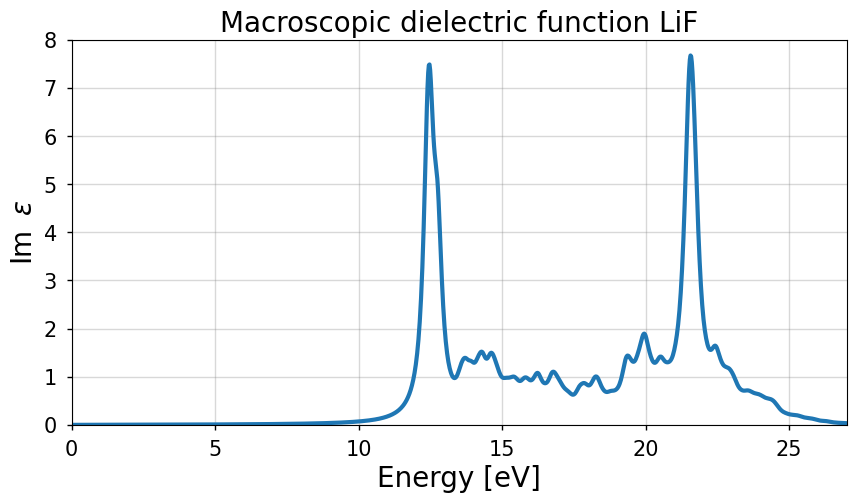

In [6]:
take_files_from_reference = True

file_source = 'ref/EPSILON/' if take_files_from_reference is True else 'run/BSE/EPSILON/'

epsilon = np.genfromtxt(os.path.join(
    file_source,'EPSILON_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT'))

set_plot_parameters(figure_width=10, figure_height=5, fontsize=20)
fig, ax =  plt.subplots()
ax.plot(epsilon[:,0], epsilon[:,2])
ax.set_xlabel('Energy [eV]')
ax.set_ylabel(r"$\mathrm{Im}\;\; \varepsilon$")
ax.set_title('Macroscopic dielectric function LiF')
ax.set_xlim(0,27)
ax.set_ylim(0,8)
plt.show()

Notice that the energy scale is given in units of eV.

Since we are dealing with a cubic system, all optical components are equivalent. For this reason, we consider only the first one along the **xx** direction (**OC11**). The above command plots the imaginary part (indicated by the i after the filename) of the macroscopic dielectric function, contained in the third column, versus energy in eV, in the first column. The file **EPSILON_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT** in the directory **EPSILON** also stores the real part of the macroscopic dielectric function calculated directly and via a Kramers-Kronig transformation of the imaginary part in the second and fourth columns, respectively. The real part may be plotted similarly to above by replacing the **-cy 3** after the filename with **-cy 2** (for the real part).

All of the main output files can by parsed by Python. In the example below, the results obtained for the dielectric function are saved in the dictionary **epsilon_results**:


In [ ]:
from excitingtools import parser_chooser

epsilon_results: dict = parser_chooser(os.path.join(os.getcwd(),
            "run/BSE/EPSILON/EPSILON_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT"))


We can further check that the obtained results are correct by comparing them with the reference calculation:

In [ ]:
from assertions_bse import test_tutorial_excited_states_from_bse
test_tutorial_excited_states_from_bse(epsilon_results, path_to_reference='ref')

**iv) Scaling and Convergence**

**BSE** calculations are extremely demanding, even on state-of-the-art computer infrastructure. The scaling with respect to the size of the **k**-mesh is **<span style="color:firebrick">quadratic</span>** with respect to the setup of the Hamlitonian (direct term). Moreover, for a full diagonalization to the eigenvalue problem the scalability goes like the **<span style="color:firebrick">third power</span>** of the **k**-mesh. An estimate for the scaling of the screened Coulomb interaction, which enters the direct term of the BSE Hamiltonian, and the full **BSE** eigenvalue problem is the 
following

$$
T_{\rm BSE} \sim \alpha_{\rm SCR}(N_v N_c N_{\bf k}) N_{\bf q}N_{\bf G}^2 + \alpha_{\rm HAM}(N_v N_c N_{\bf k})^2 N_{\bf G}^2 + \alpha_{\rm DIAG} (N_v N_c N_{\bf k})^3 
$$

where $N$ stands for the "number of" and the subscripts denote the **k**-points, **q**-points, **G**-vectors, valence and conduction states. 

The most important convergence parameters are listed here as a supplement to those explained in the tutorial **<span style="color:firebrick">Excited states from TDDFT</span>**.

Description | Parameter | Info 
:--- | :--- | :--- 
**k**-mesh/**q**-mesh | <code><span style="color:mediumblue">ngridk</span></code> inside <code><span style="color:green">xs</span></code> | crucial parameter but sometimes hard to be converged, due to the computational effort
energy cutoff (screening) | <code><span style="color:mediumblue">nempty</span></code> inside <code><span style="color:green">screening</span></code> | to be converged
local field effects **G**-cutoff | <code><span style="color:mediumblue">gqmax</span></code> inside <code><span style="color:green">xs</span></code> | defines the quality of the screened Coulomb potential in **G**-space and should be converged. High values of <code><span style="color:mediumblue">gqmax</span></code> can be computationally very costly.
number of states included in the **BSE** window | <code><span style="color:mediumblue">nstlbse</span></code> inside <code><span style="color:green">BSE</span></code> | it is necessary to include more states in this window in order to explore higher energy portion of the optical spectrum. Also, adding more states to this window can induce transition mixing, which in turn may affect the spectral features.
 


**<span style="color:darkgreen">Excercises</span>**

The following excercises can be done by adding new cells to this Notebook, following the steps presented before.

- For the given input file, decrease the local fields cutoff <code><span style="color:mediumblue">gqmax</span></code> and check how the results change.

- Modify the attribute <code><span style="color:mediumblue">bsetype</span></code> to calculate the **<span style="color:firebrick">independent particle</span>** (**IP**), **RPA** (**<span style="color:firebrick">exchange only</span>**) and **triplet** absorption spectrum for LiF. How is the spectrum modified? What are the main differences between **singlet** and **triplet** spectra? What happens when the direct term of the **BSE** Hamiltonian is switched off (**RPA** and **IP**)? If you have already computed the **singlet** spectra, you only need to execute the last task of the **BSE** program flow, i.e., "**bse**", when switching the <code><span style="color:mediumblue">bsetype</span></code> (see **<span style="color:firebrick">workflow</span>** in [1](#span-style"color4056a1"3-how-to-run-a-bse-calculation)).

    If you don't want to run all the calculations for the different options of <code><span style="color:mediumblue">bsetype</span></code> yourself, you can again make use of the reference data by setting 
    
    ```python
    take_files_from_reference = True
    ```

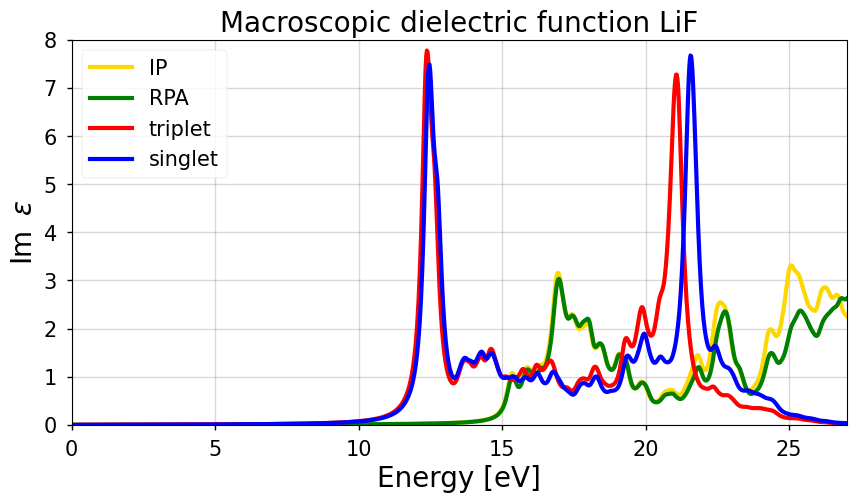

In [7]:
take_files_from_reference = True

file_source = 'ref/EPSILON/' if take_files_from_reference is True else 'run/BSE/EPSILON/'

epsilon_IP = np.genfromtxt(os.path.join(
    file_source,'EPSILON_BSE-IP_SCR-full_OC11.OUT'))
epsilon_RPA = np.genfromtxt(os.path.join(
    file_source,'EPSILON_BSE-RPA-TDA-BAR_SCR-full_OC11.OUT'))
epsilon_singlet = np.genfromtxt(os.path.join(
    file_source,'EPSILON_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT'))
epsilon_triplet = np.genfromtxt(os.path.join(
    file_source,'EPSILON_BSE-triplet-TDA-BAR_SCR-full_OC11.OUT'))


set_plot_parameters(figure_width=10, figure_height=5, fontsize=20)
fig, ax =  plt.subplots()

ax.plot(epsilon_IP[:,0], epsilon_IP[:,2], color="gold", label="IP")
ax.plot(epsilon_RPA[:,0], epsilon_RPA[:,2], color= "green", label="RPA")
ax.plot(epsilon_triplet[:,0], epsilon_triplet[:,2],  color= "red", label="triplet")
ax.plot(epsilon_singlet[:,0], epsilon_singlet[:,2], color= "blue", label="singlet")

ax.set_xlim(0,27)
ax.set_ylim(0,8)

ax.set_xlabel('Energy [eV]')
ax.set_ylabel(r"$\mathrm{Im}\;\; \varepsilon$")
ax.set_title('Macroscopic dielectric function LiF')
ax.legend()
plt.show()

- Modify the number of conduction bands considered in the **BSE** window by changing the third and fourth indices in the attributes <code><span style="color:mediumblue">nstlbse</span></code>. What is the effect on the spectrum?

In [ ]:
# Your exercise code here!

<a id='4'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">4. BSE calculations on top of GW </span>


The procedure to run **BSE** calculations in **exciting** illustrated above can be applied after computing the underlying electronic properties from a single-shot **GW** calculation. For details regarding band-structure calculations using **GW** we refer to Electronic [**bandstructure from GW**](link-needed).

In order to use the quasi-particle energies computed from **GW** as starting point for the BSE calculation, it is sufficient to include in the input file the <code><span style="color:green">gw</span></code> element. With this option the electronic eigenstates and eigenenergies are read from the **GW** output. The scissors operator specified by the attribute <code><span style="color:mediumblue">scissor</span></code> is automatically ignored. Important: Make sure that the working directory of the **BSE** calculation contains the **GW** output file **EVALQP.OUT**.


<a id='5'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">5. BSE beyond the TDA </span>

To go beyond the Tamm-Dancoff approximation we need to add <code><span style="color:mediumblue">coupling</span></code> = **"true"** in the <code><span style="color:green">BSE</span></code> element of the input file. Compared to the previous calculations on LiF performed within the **TDA** as described above, now also the resonant-anti-resonant coupling block of the screened Coulomb interaction needs to be recalculated, since the Fourier coefficients of this block are needed at different **k**-points than those of the resonant-resonant block. No additional action is required for the exchange interaction. 

To do this manually from the command line, add to the input file the <code><span style="color:green">plan</span></code> element with related attributes shown below:

```xml
      ...
      <BSE 
         bsetype="singlet"
         coupling="true"
         nstlbse="1 5 1 4" />
      ...
      <plan>
         <doonly task="screen"/>
         <doonly task="scrcoulint"/>
         <doonly task="bse"/>
      </plan>
   </xs>                 
   ...
```


For running the calculation in the notebook, we first update the **input.xml** file:


In [ ]:
species_path = os.path.join(exciting_root, "species")

input_str = f"""
<input>

   <title>LiF-BSE</title>
 
   <structure speciespath="{species_path}">
      <crystal scale="7.608">
         <basevect>0.5 0.5 0.0</basevect>
         <basevect>0.5 0.0 0.5</basevect>
         <basevect>0.0 0.5 0.5</basevect>
      </crystal>
      <species speciesfile="Li.xml">
         <atom coord="0.0000  0.0000  0.0000" />
      </species>
      <species speciesfile="F.xml">
         <atom coord="0.5000  0.5000  0.5000" />
      </species>
   </structure>
 
   <groundstate
      do="skip"
      ngridk="8 8 8"
      xctype="GGA_PBE_SOL"
      radialgridtype="cubic-2"
      gmaxvr="14.0"/>

     <xs 
      xstype="BSE" 
      ngridk="3 3 3" 
      vkloff="0.097 0.273 0.493"
      ngridq="3 3 3"
      nempty="30"
      gqmax="2.5"
      broad="0.007"
      scissor="0.20947"
      tappinfo="true"
      tevout="true">
 
      <energywindow 
         intv="0.0 1.0" 
         points="1200"/>
 
      <screening 
         screentype="full"
         nempty="100"/>
 
      <BSE 
         bsetype="singlet"
         coupling="true"
         nstlbse="1 5 1 4" />
 
      <qpointset>
         <qpoint>0.0 0.0 0.0</qpoint>
      </qpointset>
      <plan>
         <doonly task="screen"/>
         <doonly task="scrcoulint"/>
         <doonly task="bse"/>
      </plan>
   </xs> 

</input>

"""

# Write out the input as an XML file:
with open(os.path.join(os.getcwd(), 'run/BSE/input.xml'), "w") as fid:
    fid.write(input_str)

To run this calculation manually, once again type
```bash
time exciting_smp
```
or use the **BinaryRunner** class for execution within the notebook:


In [ ]:
%%bash
# move into the run directory
cd run/BSE; 
# load the necessary modules
module load intel;
# run exciting
time $EXCITINGROOT/bin/exciting_smp input.xml;
# move back to parent directory 
cd ..;

After the calculation is finished, new files will appear in the working directory as well as in the sub-folders. Again, we are interested in analyzing the new spectra and the new excitation energies. Please note that the new files **DO NOT** contain the additional string **-TDA-BAR**. To plot the imaginary part of the dielectric function in the notebook, execute the following cell. This calculation will take a couple of minutes - if you don't want to wait, you can again make use of the provided reference data by setting 

```python
 take_files_from_reference = True
 ```


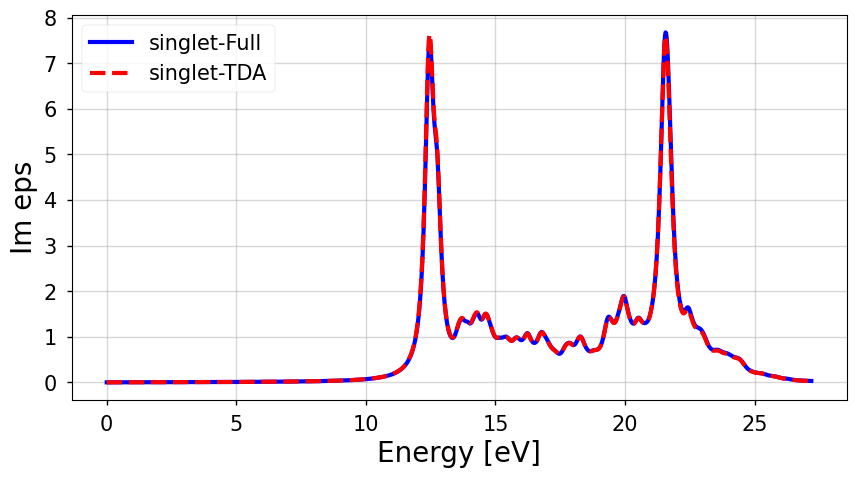

In [8]:
import matplotlib.pyplot as plt
import numpy as np

take_files_from_reference = True

file_name = {True: 'ref/EPSILON', False: 'run/BSE/EPSILON'}
data_directory = os.path.join(os.getcwd(), file_name[take_files_from_reference])

epsilon = np.genfromtxt(os.path.join(
    data_directory,'EPSILON_BSE-singlet-TDA-BAR_SCR-full_OC11.OUT'))
epsilon_tda = np.genfromtxt(
        os.path.join(data_directory,'EPSILON_BSE-singlet_SCR-full_OC11.OUT'))

set_plot_parameters(figure_width=10, figure_height=5, fontsize=20)
fig, ax =  plt.subplots()
ax.plot(epsilon[:,0], epsilon[:,2], label="singlet-Full", color="blue")
ax.plot(epsilon_tda[:,0], epsilon_tda[:,2],'--', label="singlet-TDA", color="red")


ax.set_xlabel('Energy [eV]')
ax.set_ylabel('Im eps')
plt.legend()
plt.show()

In the case of LiF, there is no significant difference between the optical absorption spectrum computed within the **TDA** and by solving the full **BSE**.


<a id='6'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">Literature</span>

- **<span style="color:firebrick">BSE-1951</span>**: The **BSE** has been introduced for the first time in E.E. Salpeter and H.A. Bethe, Phys. Rev. **84**, 1232 (1951).
- **<span style="color:firebrick">SAD-2009</span>**: Details on implementation and application of the **BSE** formalism in **exciting**: Stephan Sagmeister and Claudia Ambrosch-Draxl, <em>Time-dependent density functional theory versus Bethe-Salpeter equation: An all-electron study</em>, Phys. Chem. Chem. Phys. **11**, 4451 (2009) [PDF](https://pubs.rsc.org/en/content/articlelanding/2009/CP/b903676h).
- More details on the implementation of the **BSE formalism** within the LAPW method and applications to organic semiconductors: S. Sagmeister, PhD thesis, University of Graz, August 2009 [PDF](https://www.box.net/s/rpqegscqxr).
- Additional information on the **BSE** implementation beyond the **TDA** and zero momentum transfer can be found in B. Aurich's Master thesis [PDF](http://exciting.wdfiles.com/local--files/oxygen-excited-states-from-bse/BSEtheory.pdf).
- **<span style="color:firebrick">STR-1988</span>**: <em>Application of the Green’s functions method to the study of the optical properties of semiconductors</em>, G. Strinati, Riv. Nuovo Cim. (1988) [PDF](https://link.springer.com/article/10.1007/BF02725962).
- **<span style="color:firebrick">SAN-2015</span>**: <em>Beyond the Tamm-Dancoff approximation for extended systems using exact diagonalization</em>, T. Sander, <em>et al</em> (2015) [PDF](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.92.045209).
- **<span style="color:firebrick">ONI-2002</span>**: <em>Electronic excitations: density-functional versus many-body Green's-function approaches</em>, G. Onida, <em>et al</em> (2015) [PDF](https://journals.aps.org/rmp/abstract/10.1103/RevModPhys.74.601).


<hr style="border:2px solid #DDD"> </hr>